Dataset : https://www.kaggle.com/datasets/laavanya/human-stress-detection-in-and-through-sleep

## Install Lib

In [1]:
!pip install sweetviz

#Load Data and Preprocessing

In [2]:
import pandas as pd
import sweetviz as sv

In [3]:
cols = ['snoring_rate',
'respiration_rate',
'body_temperature',
'limb_movement',
'blood_oxygen',
'eye_movement',
'sleeping_hours',
'heart_rate',
'stress_level']

In [4]:
pth="/content/drive/MyDrive/MSIB/06. Classification/"

In [5]:
df = pd.read_csv(pth+"SaYoPillow.csv")
df.columns = cols
df.head()

,snoring_rate,respiration_rate,body_temperature,limb_movement,blood_oxygen,eye_movement,sleeping_hours,heart_rate,stress_level
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [6]:
df.shape

(630, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   snoring_rate      630 non-null    float64
 1   respiration_rate  630 non-null    float64
 2   body_temperature  630 non-null    float64
 3   limb_movement     630 non-null    float64
 4   blood_oxygen      630 non-null    float64
 5   eye_movement      630 non-null    float64
 6   sleeping_hours    630 non-null    float64
 7   heart_rate        630 non-null    float64
 8   stress_level      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


In [8]:
df.isnull().sum()

snoring_rate        0
respiration_rate    0
body_temperature    0
limb_movement       0
blood_oxygen        0
eye_movement        0
sleeping_hours      0
heart_rate          0
stress_level        0
dtype: int64

In [9]:
x = df.drop('stress_level',axis=1)
y = df.stress_level

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.7)
print(x_train.shape, x_test.shape)

(441, 8) (189, 8)


#EDA

In [11]:
df_train = pd.DataFrame(x_train, columns=x.columns).reset_index(drop=True)
df_train['stress_level'] = y_train.values
df_train['stress_level'] = df_train['stress_level'].astype('float')

df_test = pd.DataFrame(x_test, columns=x.columns).reset_index(drop=True)
df_test['stress_level'] = y_test.values
df_test['stress_level'] = df_test['stress_level'].astype('float')

                                             |          | [  0%]   00:00 -> (? left)


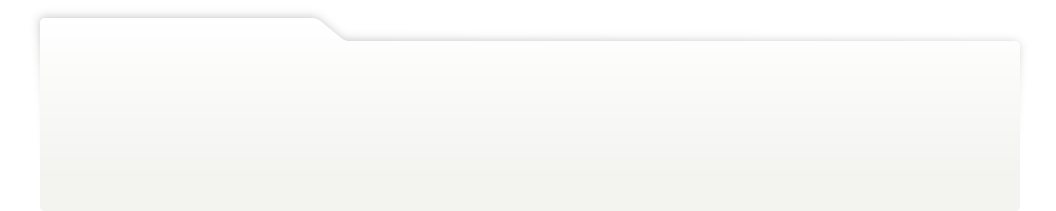
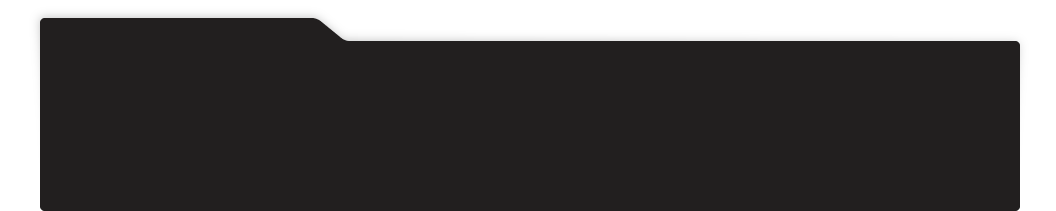
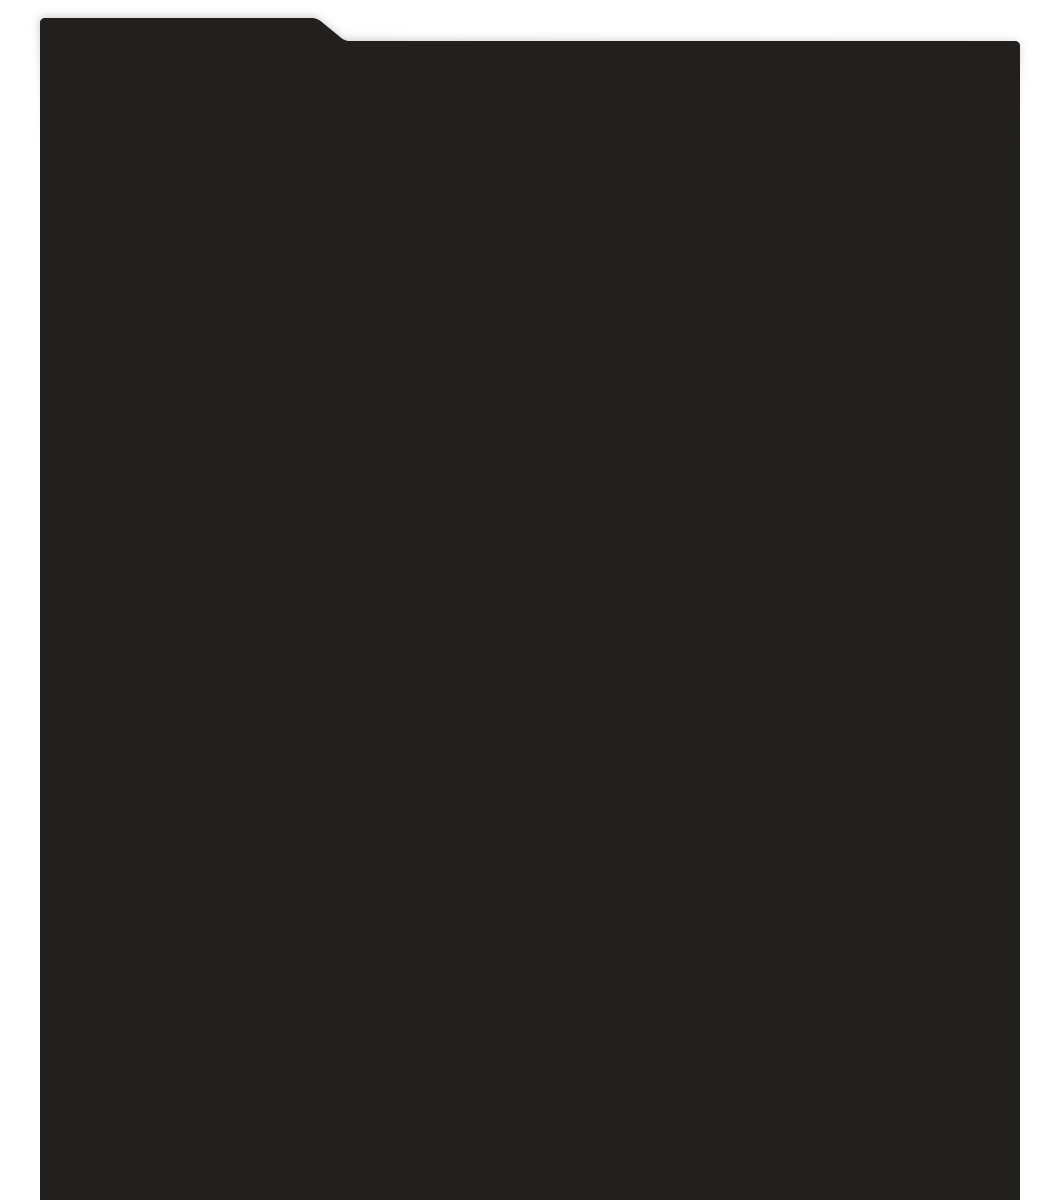
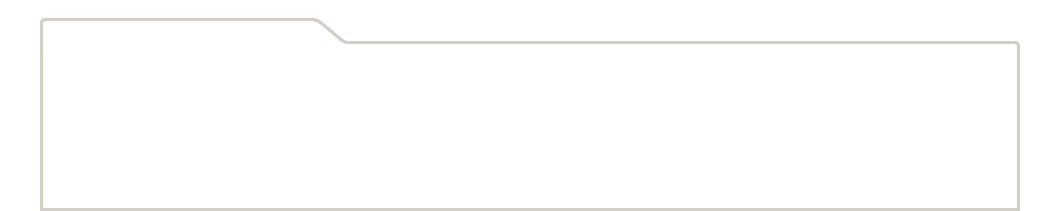
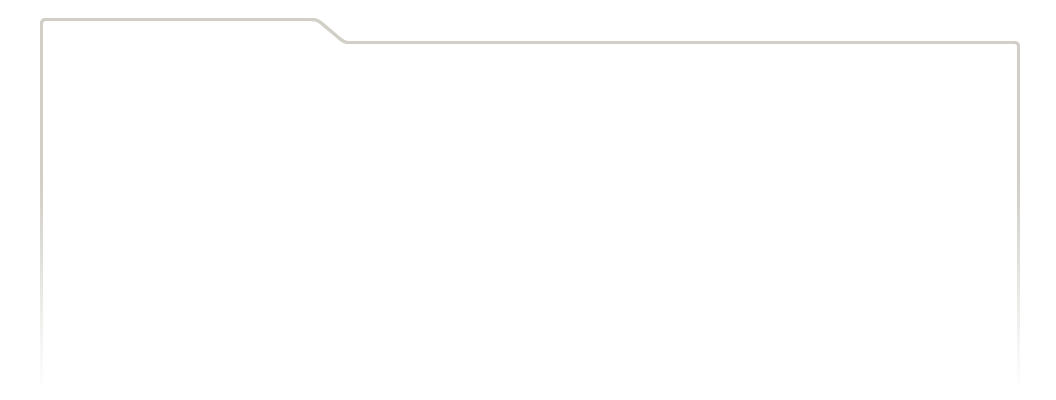
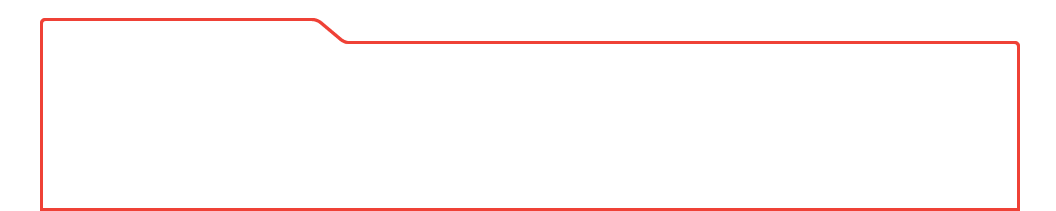
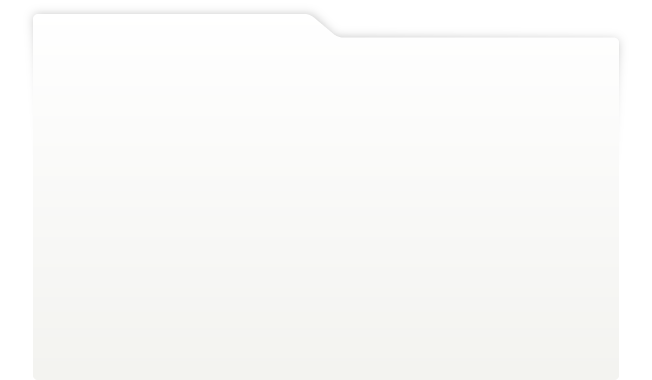
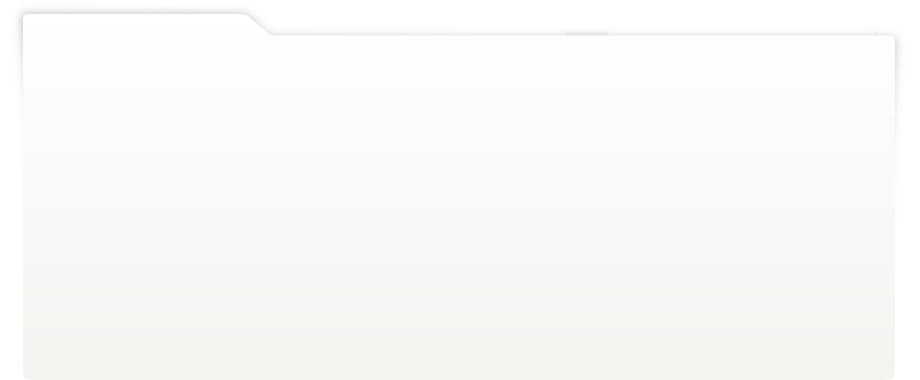
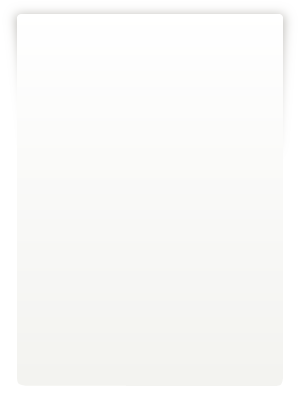
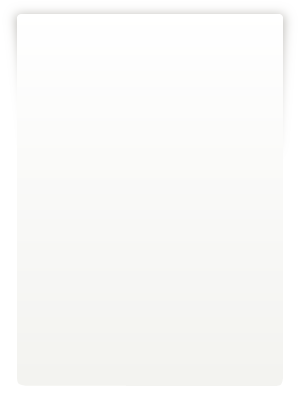
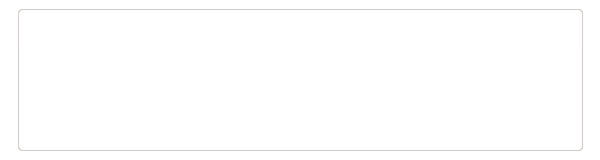
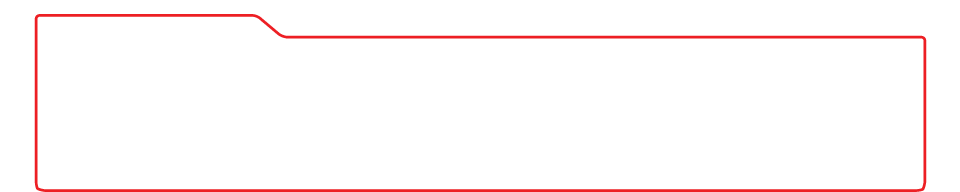
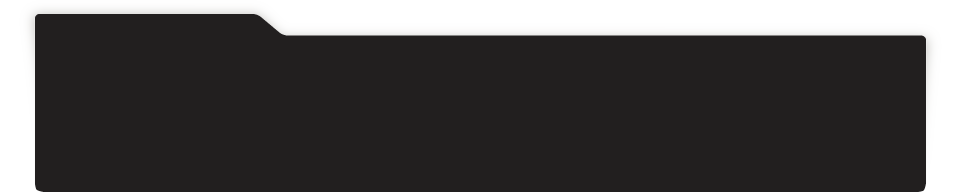
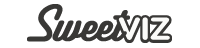
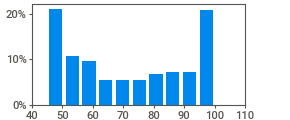
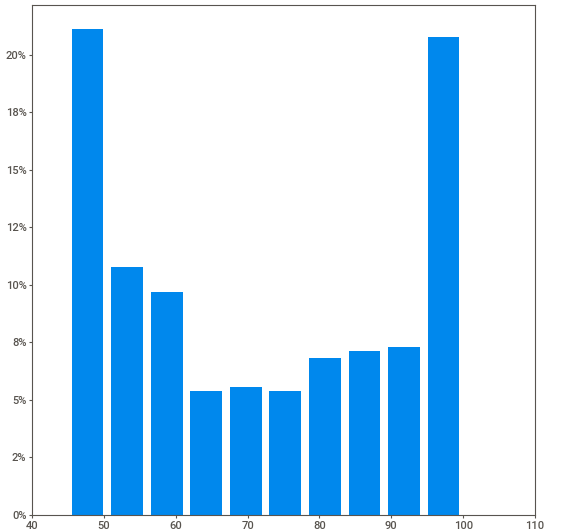
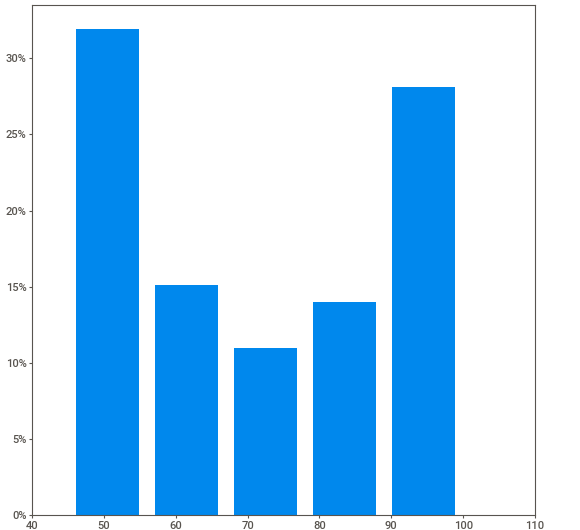
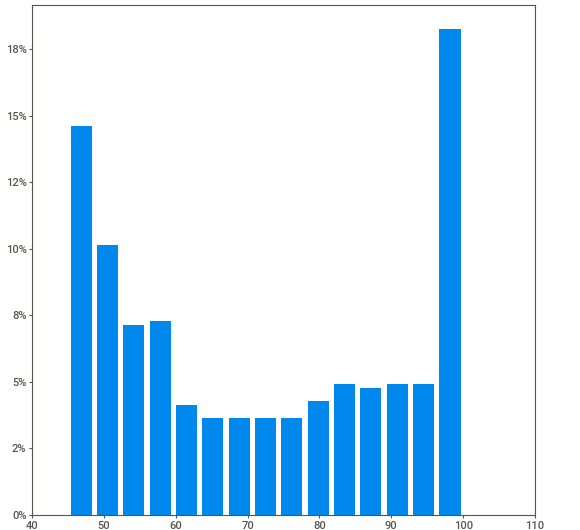
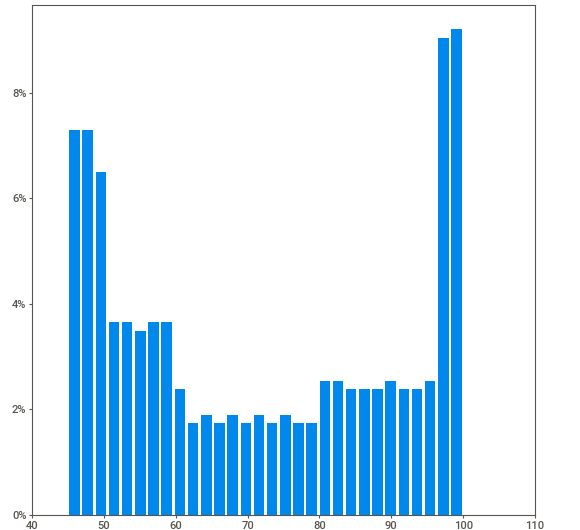
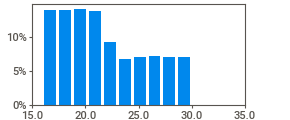
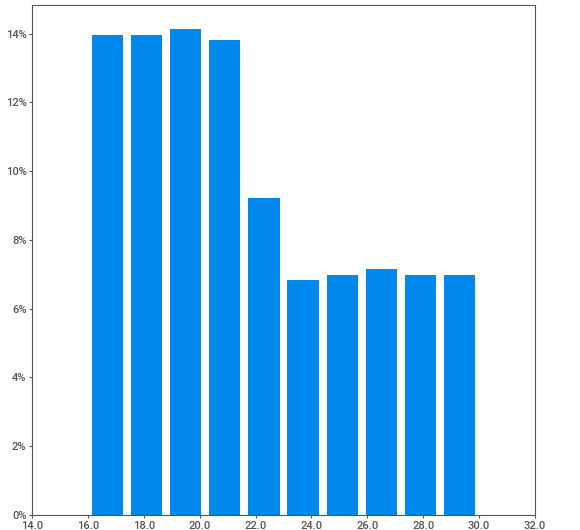
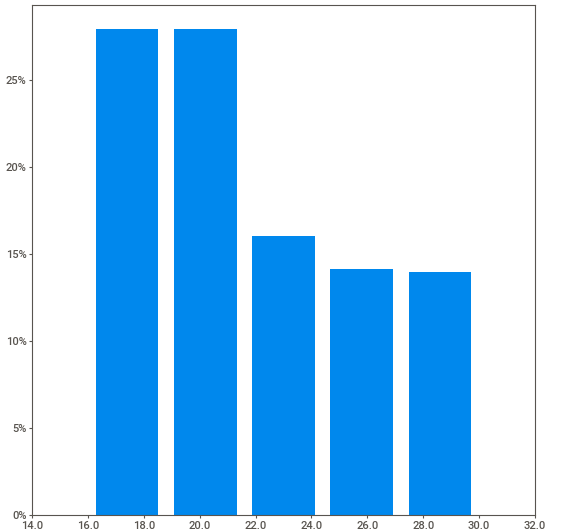
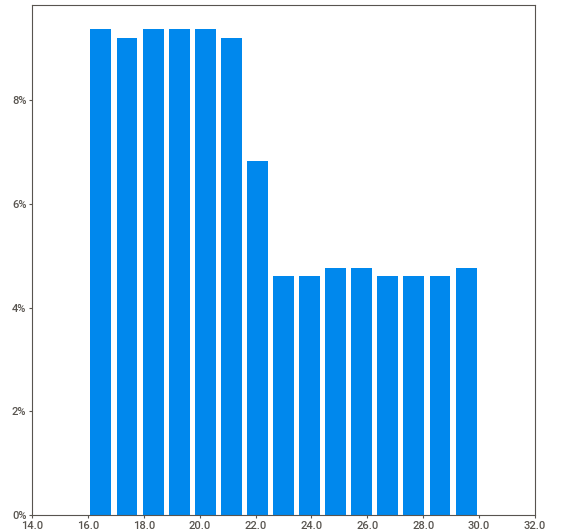
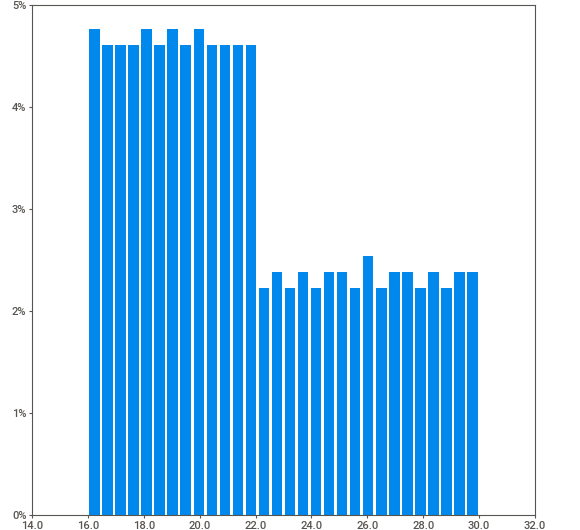
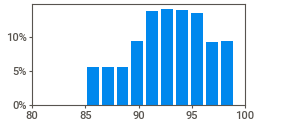
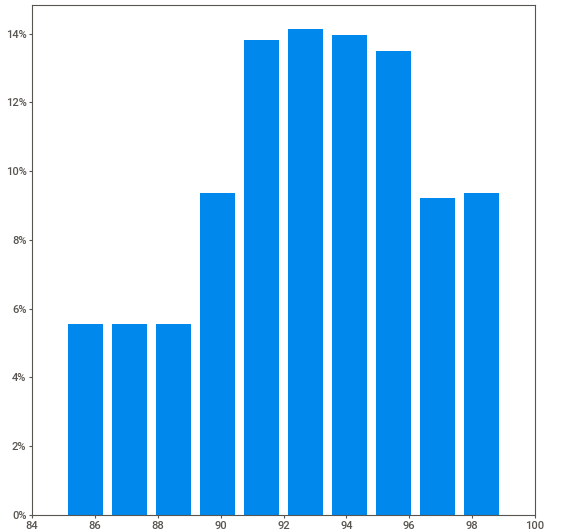
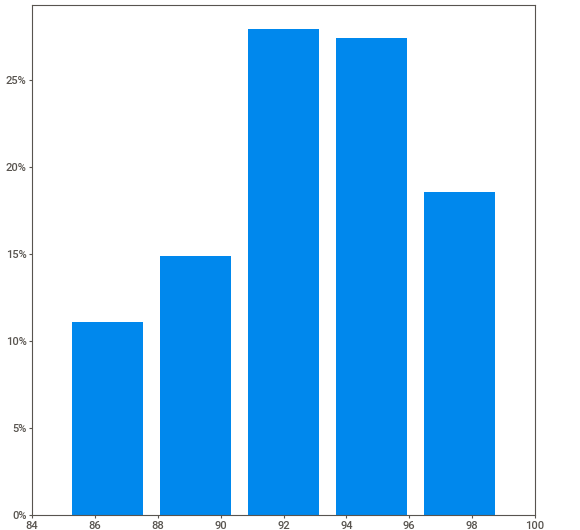
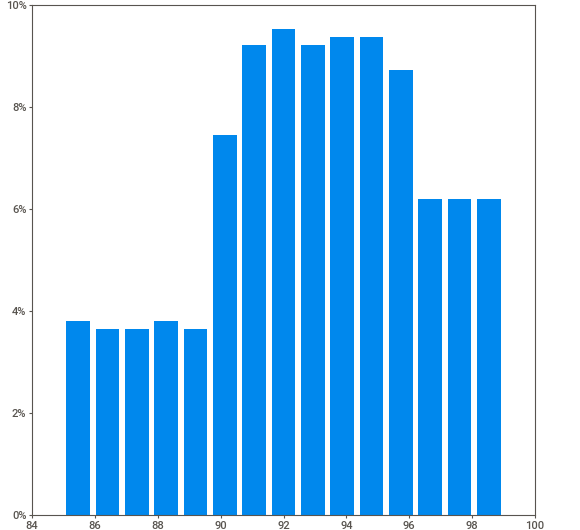
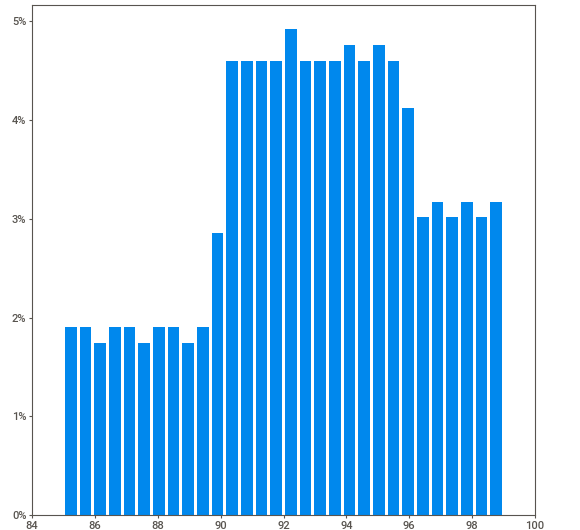
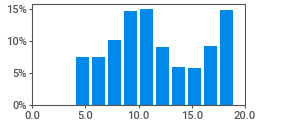
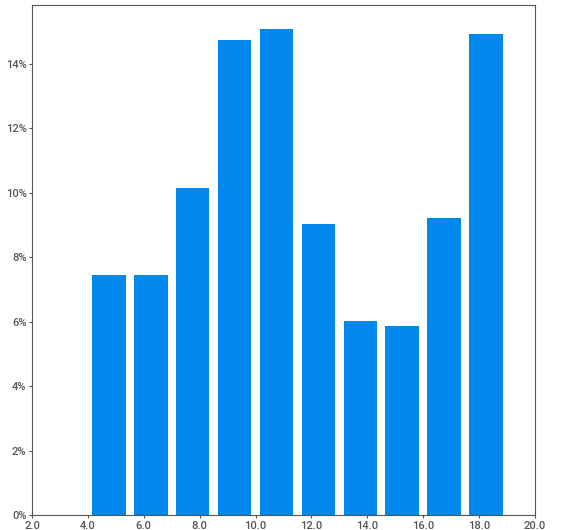
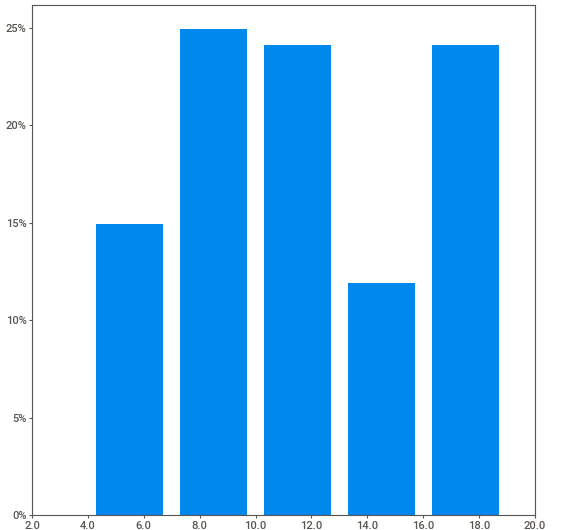
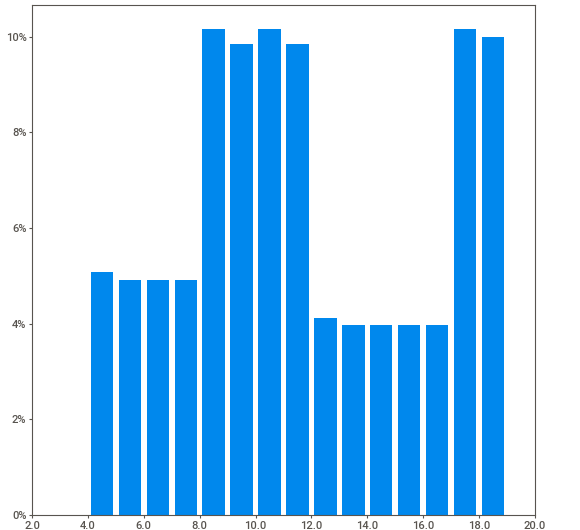
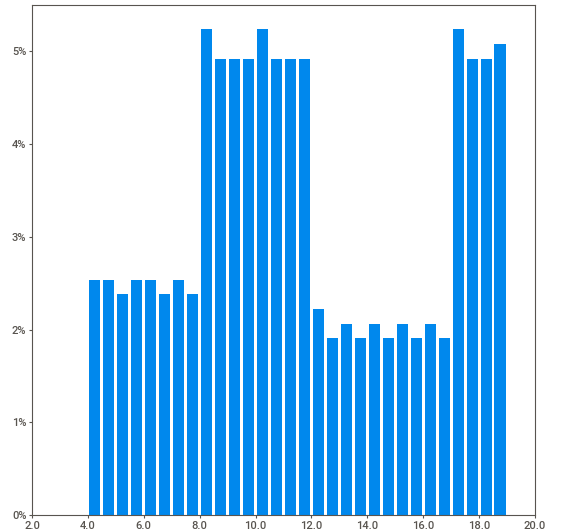
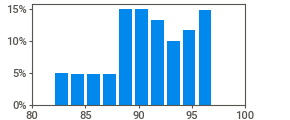
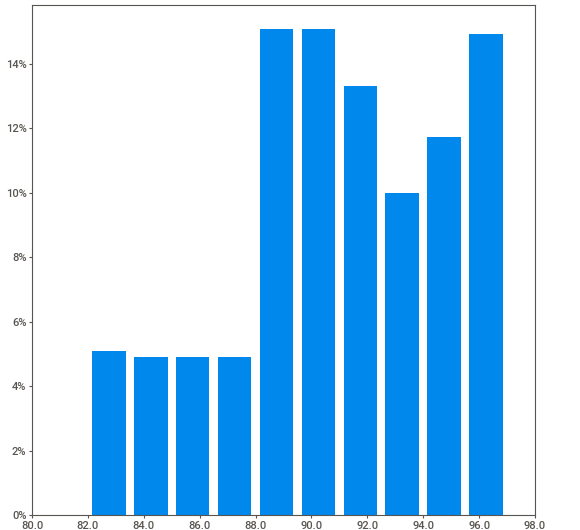
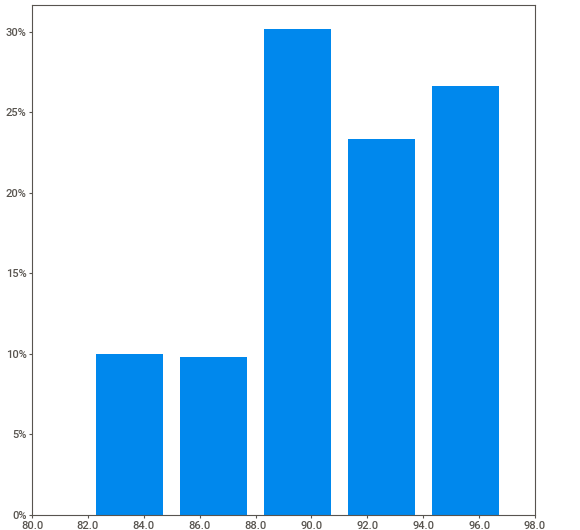
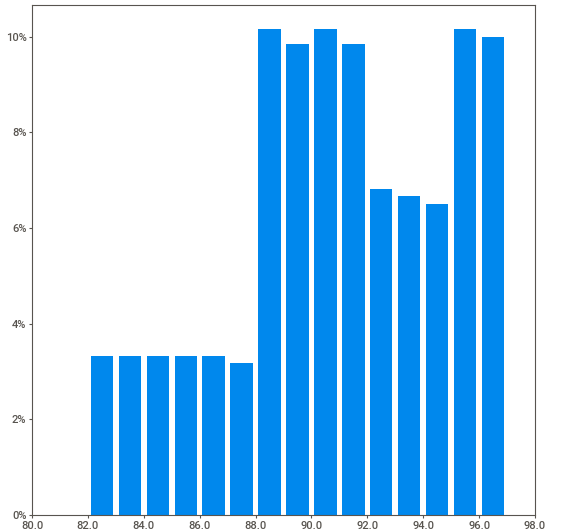
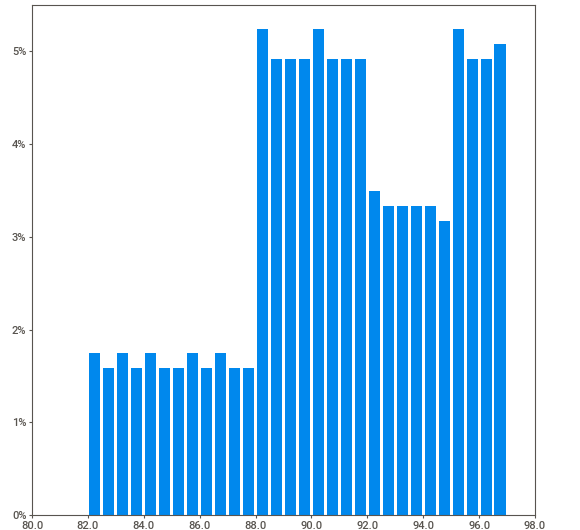
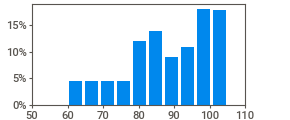
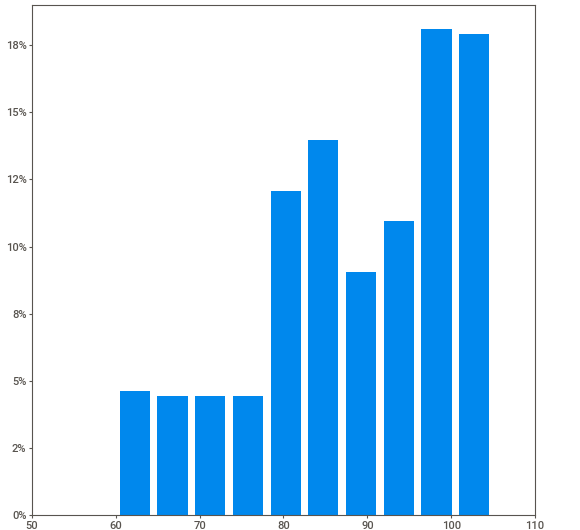
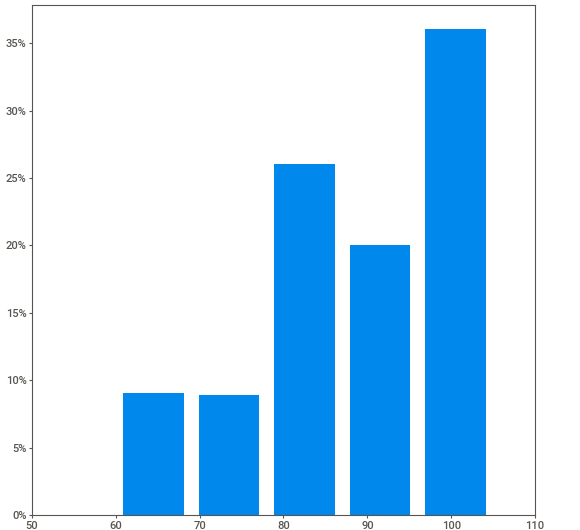
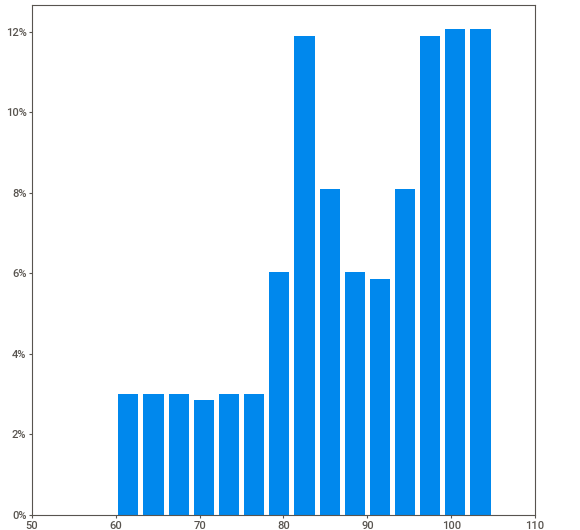
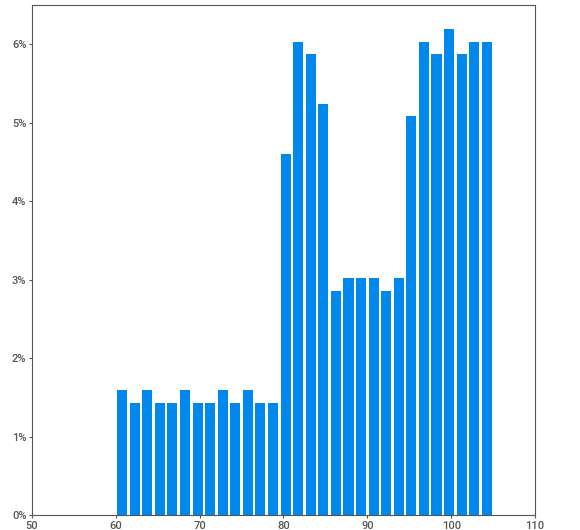
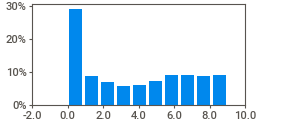
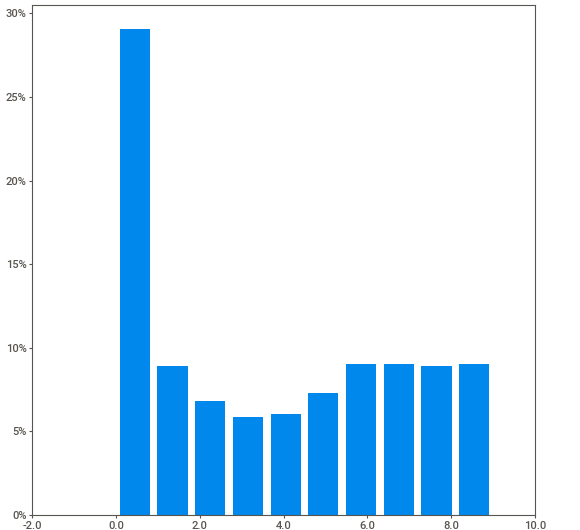
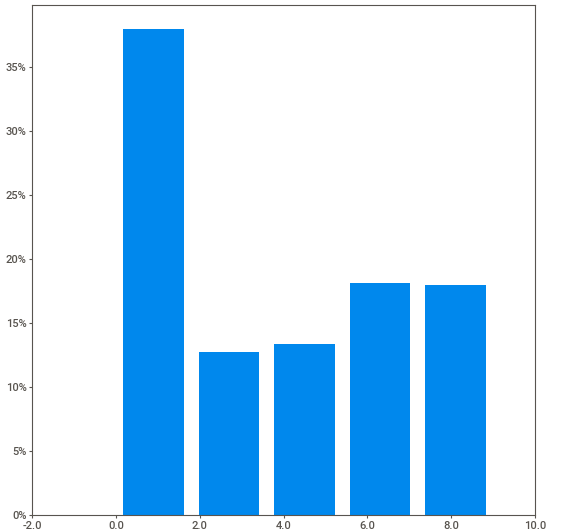
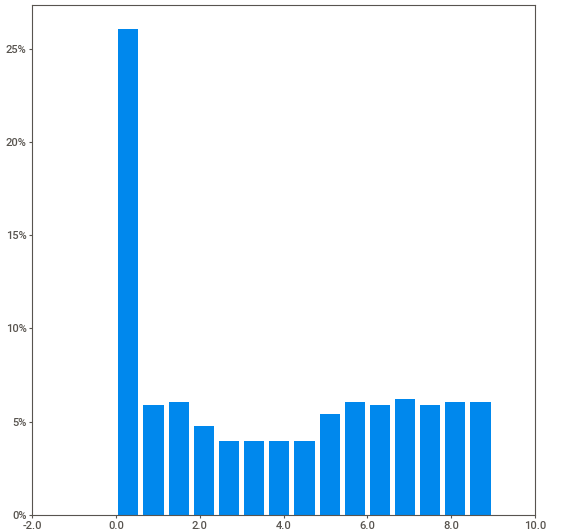
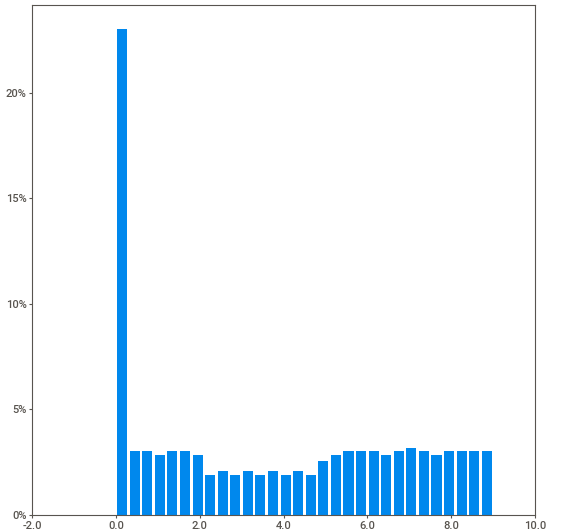
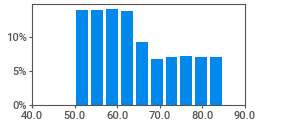
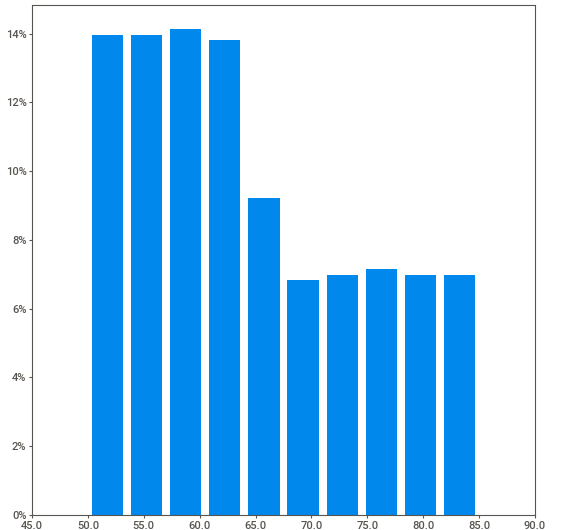
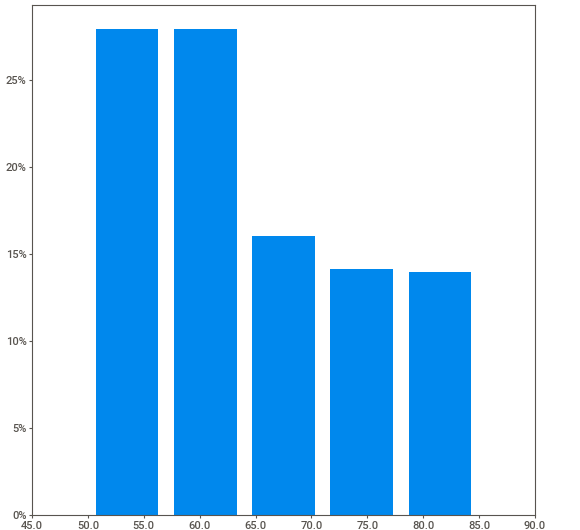
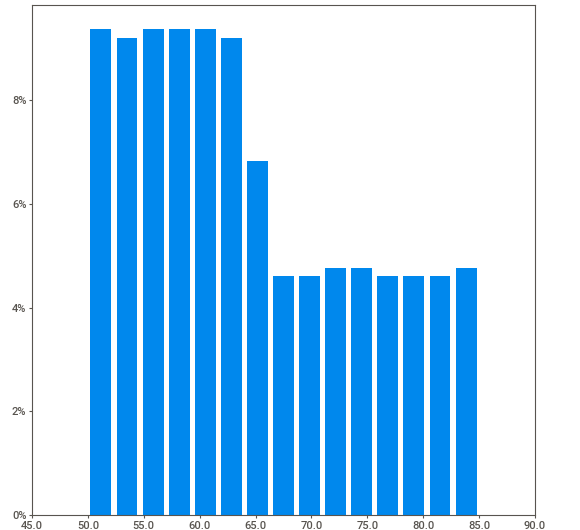
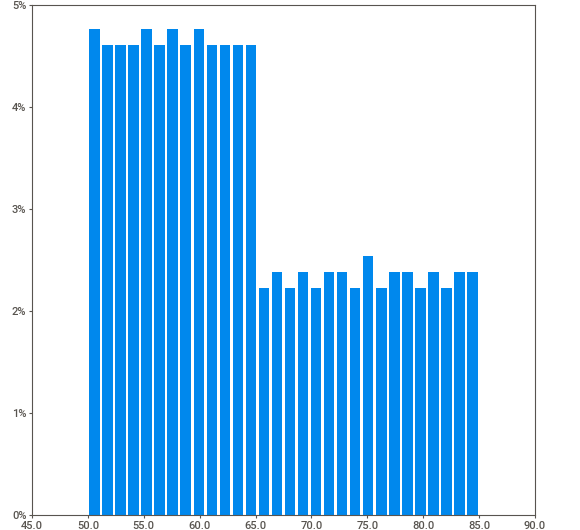
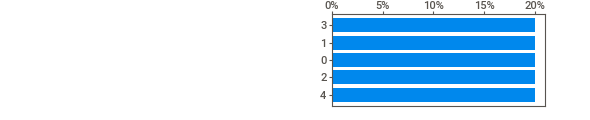
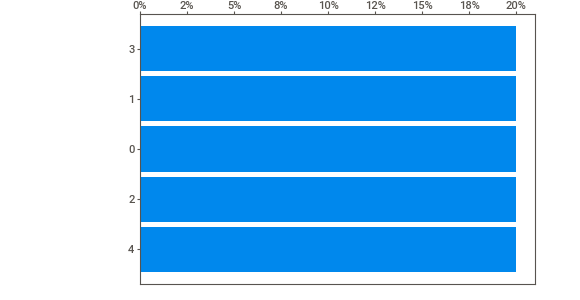
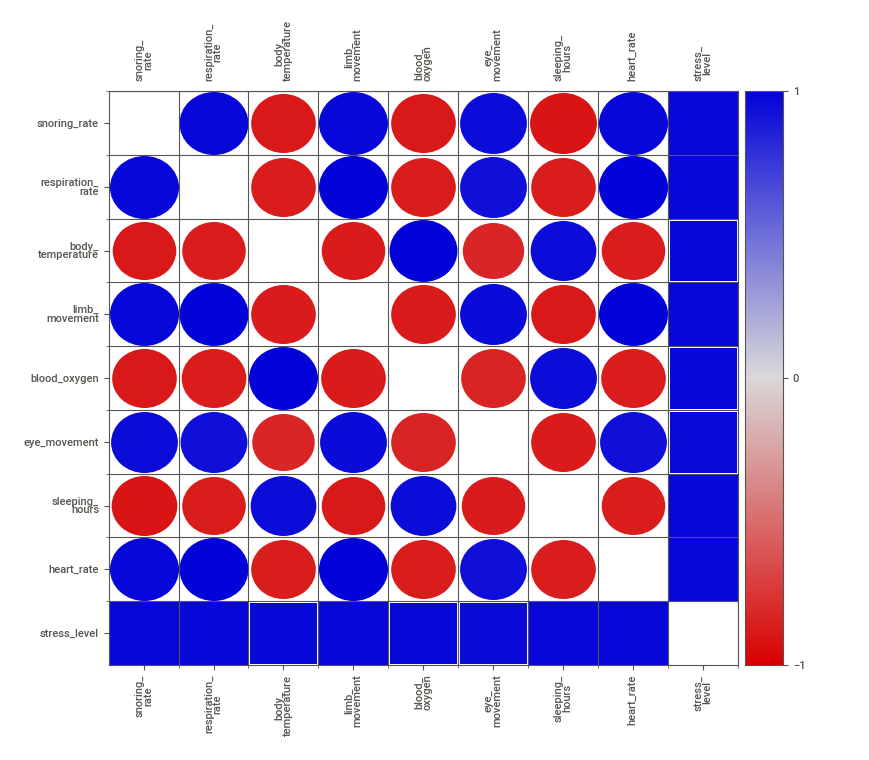
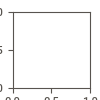

In [12]:
report = sv.analyze(df)
# report.show_html(pth+"report.html")
report.show_notebook()

In [13]:
feature_config = sv.FeatureConfig(force_num = ["stress_level"])

report = sv.compare([df_train, "Train"], [df_train, "Test"], 'stress_level', feature_config)
report.show_notebook()

Output hidden; open in https://colab.research.google.com to view.

#Modelling

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import pickle

##KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00        37
           3       1.00      1.00      1.00        38
           4       1.00      1.00      1.00        37

    accuracy                           1.00       189
   macro avg       1.00      1.00      1.00       189
weighted avg       1.00      1.00      1.00       189

[[30  0  0  0  0]
 [ 0 47  0  0  0]
 [ 0  0 37  0  0]
 [ 0  0  0 38  0]
 [ 0  0  0  0 37]]


In [16]:
# save the model to disk
filename = pth+'KNN.sav'
pickle.dump(model, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

1.0


##DT

In [17]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        30
           1       1.00      0.96      0.98        47
           2       1.00      0.97      0.99        37
           3       0.97      1.00      0.99        38
           4       1.00      1.00      1.00        37

    accuracy                           0.98       189
   macro avg       0.98      0.99      0.98       189
weighted avg       0.98      0.98      0.98       189

[[30  0  0  0  0]
 [ 2 45  0  0  0]
 [ 0  0 36  1  0]
 [ 0  0  0 38  0]
 [ 0  0  0  0 37]]


In [18]:
# save the model to disk
filename = pth+'DT.sav'
pickle.dump(model, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.9841269841269841


##SVM

In [19]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.98      1.00      0.99        47
           2       1.00      0.97      0.99        37
           3       1.00      1.00      1.00        38
           4       1.00      1.00      1.00        37

    accuracy                           0.99       189
   macro avg       1.00      0.99      1.00       189
weighted avg       0.99      0.99      0.99       189

[[30  0  0  0  0]
 [ 0 47  0  0  0]
 [ 0  1 36  0  0]
 [ 0  0  0 38  0]
 [ 0  0  0  0 37]]


In [20]:
# save the model to disk
filename = pth+'SVM.sav'
pickle.dump(model, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.9947089947089947
